In [409]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation as cval
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from pandas.tools.plotting import andrews_curves
from pandas.tools.plotting import parallel_coordinates
import sklearn.metrics as metrics
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import xgboost as xgb

In [374]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [375]:
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [127]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [128]:
#Univariate Analysis

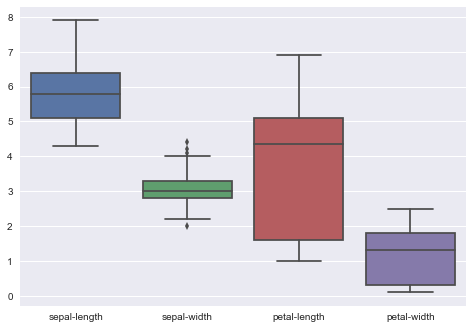

In [129]:
#Box plots visualization
sns.boxplot(data=dataset)
plt.show()

#As is evident from the descriptive statistics above and below box plot, sepal-length median values are highest followed 
#by petal-length, sepa-width and petal-width. Petal-length has maximum variance (spread of values)

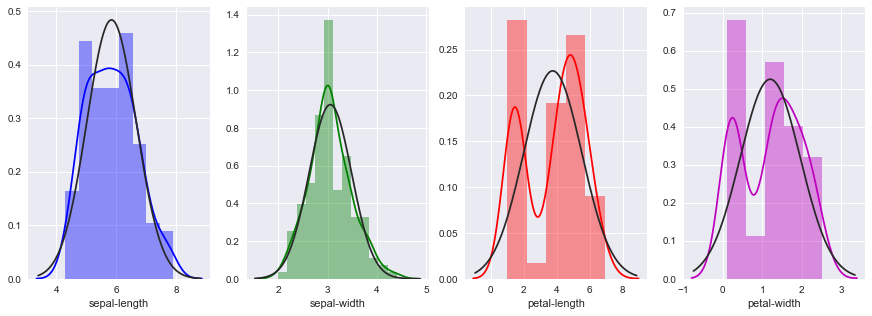

In [130]:
#plotting the distributions of the predictors
fig, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(15,5))
sns.distplot(dataset['sepal-length'],ax=axis1, color='b', fit=norm)
sns.distplot(dataset['sepal-width'],ax=axis2, color='g', fit=norm)
sns.distplot(dataset['petal-length'],ax=axis3,color='r',fit=norm)
sns.distplot(dataset['petal-width'],ax=axis4, color='m',fit=norm)
plt.show()

#distributions of sepal-length and sepal-width are close to normal

In [376]:
#Class
class_labels = dataset['class'].unique()

In [377]:
dataset['class'] = dataset['class'].map({'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2}) 

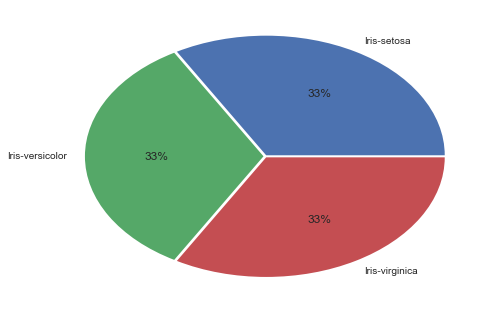

In [311]:
#Pie chart 
explode=(0.01,0.01,0.01)
plt.pie(np.bincount(dataset['class']), labels=class_labels, explode=explode, autopct='%1.0f%%')
plt.show()

#indicates the class is equally distributed

In [ ]:
#Bi-variate analysis

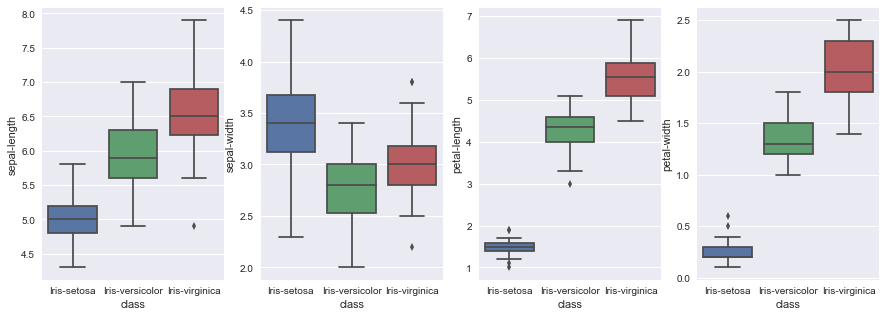

In [74]:
fig, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(15,5))
sns.boxplot(data=dataset, y= 'sepal-length',x='class', ax=axis1)
sns.boxplot(data=dataset, y= 'sepal-width',x='class', ax=axis2)
sns.boxplot(data=dataset, y= 'petal-length',x='class', ax=axis3)
sns.boxplot(data=dataset, y= 'petal-width',x='class', ax=axis4)
plt.show()

#The boxplots are categorized on the basis of class labels
#Indicates Iris-virginica has higher values of sepal-length, petal-length and petal-width
#Indicates Iris-setosa has lower values of sepal-length, petal-length and petal-width but higher values of sepal-width

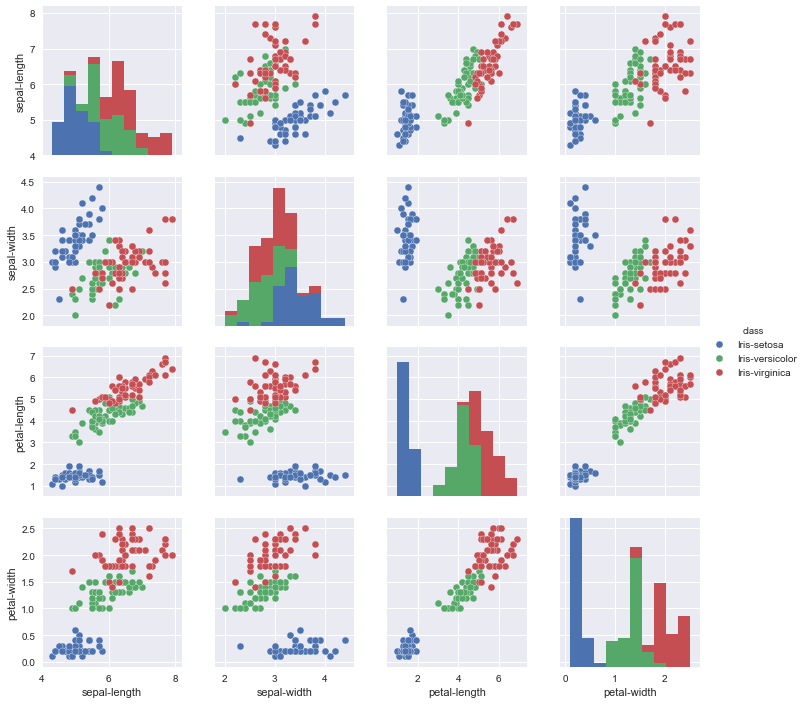

In [52]:
sns.pairplot(data=dataset, hue='class')
plt.show()

#petal-length and petal-width are linearly correlated

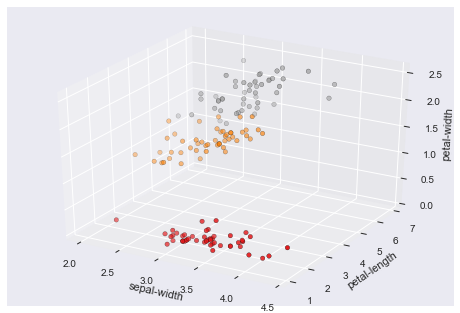

In [239]:
#3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['sepal-width'], dataset['petal-length'], dataset['petal-width'],zdir='z', s=20, c=dataset['class'], edgecolor='k', cmap=plt.cm.Set1, marker = 'o')
ax.set_xlabel("sepal-width")
ax.set_ylabel("petal-length")
ax.set_zlabel("petal-width")
plt.show()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


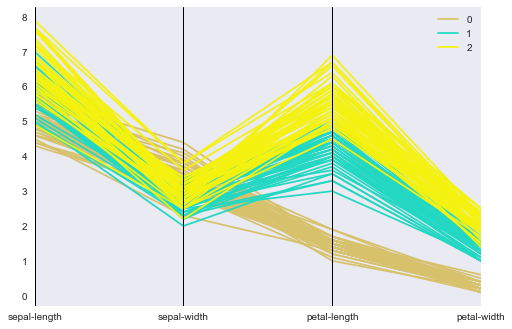

In [176]:
#Parallel Coordinates
plt.figure()
parallel_coordinates(dataset, 'class');
plt.show()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


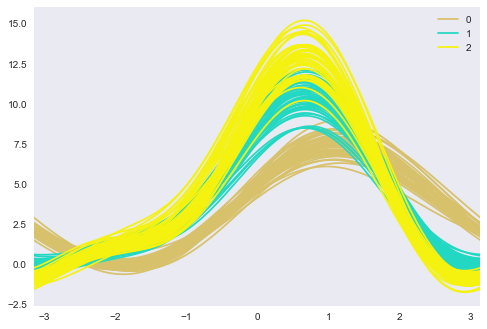

In [177]:
#Andrew Curves
plt.figure()
andrews_curves(dataset, 'class');
plt.show()

#each record is plotted as a curve with the feature values as the coefficients of the curve
#similar records tend to group

In [378]:
#separate class labels from features
labels = dataset['class'].copy()
dataset.drop(labels=['class'], inplace=True, axis=1)

In [380]:
#Feature Scaling
#StandardScaler
def scaleFeatures(df):
  scaled = preprocessing.StandardScaler().fit_transform(df)
  scaled = pd.DataFrame(scaled, columns=df.columns)
  print "New Variances:\n", scaled.var()
  print "\nNew Describe:\n", scaled.describe()
  return scaled

In [340]:
dataset_T = scaleFeatures(dataset)

New Variances:
sepal-length    1.006711
sepal-width     1.006711
petal-length    1.006711
petal-width     1.006711
class           1.006711
dtype: float64

New Describe:
       sepal-length   sepal-width  petal-length   petal-width         class
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -2.775558e-16 -5.140333e-16  1.154632e-16  9.251859e-16  1.184238e-17
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00
min   -1.870024e+00 -2.438987e+00 -1.568735e+00 -1.444450e+00 -1.224745e+00
25%   -9.006812e-01 -5.877635e-01 -1.227541e+00 -1.181504e+00 -1.224745e+00
50%   -5.250608e-02 -1.249576e-01  3.362659e-01  1.332259e-01  0.000000e+00
75%    6.745011e-01  5.692513e-01  7.627586e-01  7.905908e-01  1.224745e+00
max    2.492019e+00  3.114684e+00  1.786341e+00  1.710902e+00  1.224745e+00


In [341]:
#Feature Selection & Dimensionality Reduction

In [381]:
#Principal Component Analysis
def doPCA(data, dimensions=2):
  model = PCA(n_components=dimensions, svd_solver='randomized', random_state=7)
  model.fit(data) #svd_solver=’randomized’ for randomized pca
  return model

In [382]:
pcamodel= doPCA(dataset)
dataset_pca =pcamodel.transform(dataset)

explained variance ratio (first two components): [ 0.92264045  0.04810411]


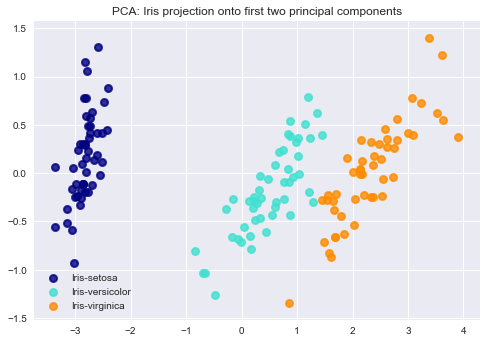

In [364]:
#Plotting the samples on the first 2 principal components
print('explained variance ratio (first two components): %s'
      % str(pcamodel.explained_variance_ratio_))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], class_labels):
    plt.scatter(dataset_pca[labels == i, 0], dataset_pca[labels == i, 1], color=color, alpha=.8, lw=lw,
                label=class_labels);
plt.title('PCA: Iris projection onto first two principal components')
plt.legend(class_labels, loc='best')
plt.show()

In [383]:
#Linear Discriminat Analysis
def doLDA(data, labels,dimensions=2):
  model = LinearDiscriminantAnalysis(n_components=dimensions)
  model.fit(data ,labels) 
  return model

In [384]:
ldamodel= doLDA(dataset, labels)
dataset_lda =ldamodel.transform(dataset)

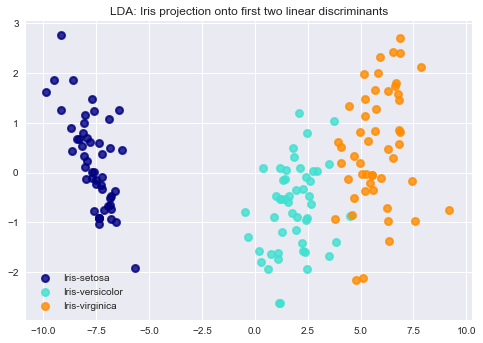

In [363]:
for color, i, target_name in zip(colors, [0, 1, 2], class_labels):
    plt.scatter(dataset_lda[labels == i, 0], dataset_lda[labels == i, 1], color=color, alpha=.8, lw=lw,
                label=class_labels);
plt.title('LDA: Iris projection onto first two linear discriminants')
plt.legend(class_labels, loc='best')
plt.show()

In [193]:
#Apply classification models

In [366]:
#Create a function to display results for each of the models
def classModel(model,dataset,labels):
    model.fit(dataset, labels)
    predictions=model.predict(dataset)
    
    print "Accuracy (Training Data) : %s" % "{0:.2%}".format(model.score(dataset, labels))
    
    print "Cross Validation Score : %s" % "{0:.2%}".format((cval.cross_val_score(model, dataset, labels, cv=5).mean()))
    
    print metrics.classification_report(labels, predictions, target_names=class_labels)
    

In [419]:
#Logistic Regression
logreg = LogisticRegression(multi_class='multinomial',solver='newton-cg')
classModel(logreg,dataset,labels)

print "For dataset transformed by StandardScaler"
classModel(logreg,dataset_T,labels)

#Similarly check for PCA and LDA transformed datasets

Accuracy (Training Data) : 97.33%
Cross Validation Score : 97.33%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

    avg / total       0.97      0.97      0.97       150

For dataset transformed by StandardScaler
Accuracy (Training Data) : 100.00%
Cross Validation Score : 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

    avg / total       1.00      1.00      1.00       150



In [413]:
# Support Vector Machines
svc = SVC()
classModel(svc,dataset,labels)

print "For dataset transformed by StandardScaler"
classModel(svc,dataset_T,labels)

#Similarly check for PCA and LDA transformed datasets

Accuracy (Training Data) : 98.67%
Cross Validation Score : 98.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      0.96      0.98        50
 Iris-virginica       0.96      1.00      0.98        50

    avg / total       0.99      0.99      0.99       150

For dataset transformed by StandardScaler
Accuracy (Training Data) : 100.00%
Cross Validation Score : 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

    avg / total       1.00      1.00      1.00       150



In [422]:
# knn = KNeighborsClassifier(n_neighbors = 3)
knn = KNeighborsClassifier(n_neighbors = 3)
classModel(knn,dataset,labels)

print "For dataset transformed by StandardScaler"
classModel(knn,dataset_T,labels)

#Similarly check for PCA and LDA transformed datasets

Accuracy (Training Data) : 96.00%
Cross Validation Score : 96.67%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.94      0.94        50
 Iris-virginica       0.94      0.94      0.94        50

    avg / total       0.96      0.96      0.96       150

For dataset transformed by StandardScaler
Accuracy (Training Data) : 100.00%
Cross Validation Score : 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

    avg / total       1.00      1.00      1.00       150



In [416]:
#Gaussian Naive Bayes Classifier
gaussian = GaussianNB()
classModel(gaussian,dataset,labels)

print "For dataset transformed by StandardScaler"
classModel(gaussian,dataset_T,labels)

#Similarly check for PCA and LDA transformed datasets

Accuracy (Training Data) : 96.00%
Cross Validation Score : 95.33%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.94      0.94        50
 Iris-virginica       0.94      0.94      0.94        50

    avg / total       0.96      0.96      0.96       150

For dataset transformed by StandardScaler
Accuracy (Training Data) : 100.00%
Cross Validation Score : 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

    avg / total       1.00      1.00      1.00       150



In [418]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=100)
classModel(random_forest,dataset,labels)

print "For dataset transformed by StandardScaler"
classModel(random_forest,dataset_T,labels)

#Similarly check for PCA and LDA transformed datasets

Accuracy (Training Data) : 100.00%
Cross Validation Score : 96.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

    avg / total       1.00      1.00      1.00       150

For dataset transformed by StandardScaler
Accuracy (Training Data) : 100.00%
Cross Validation Score : 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

    avg / total       1.00      1.00      1.00       150



In [417]:
#XGBoost
gbm = xgb.XGBClassifier(n_estimators=180)
classModel(gbm,dataset,labels)

print "For dataset transformed by StandardScaler"
classModel(gbm,dataset_T,labels)

#Similarly check for PCA and LDA transformed datasets

Accuracy (Training Data) : 100.00%
Cross Validation Score : 96.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

    avg / total       1.00      1.00      1.00       150

For dataset transformed by StandardScaler
Accuracy (Training Data) : 100.00%
Cross Validation Score : 100.00%
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

    avg / total       1.00      1.00      1.00       150

